# Feature Engineering

We will be performing all the below steps in Feature Engineering

    Missing values
    Categorical variables: remove rare labels
    Outliers treatment
    Standarise the values of the variables to the same range



We need to fill null values with mean and median

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
#Load data to describe 
df_train = pd.read_csv('/workspaces/loan-elegibility-prediction/data/raw/loan-train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/loan-elegibility-prediction/data/raw/loan-train.csv'

We are going to exclude 'Loan_ID' from the data set as it is not relevant.

In [ ]:
df_train=df_train.drop(['Loan_ID'], axis=1)

**Missing Values Treatment**

In [ ]:
df_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

    For numerical variables: imputation using mean or median
    For categorical variables: imputation using mode

There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

In [ ]:
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

/tmp/ipykernel_34369/1855792776.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
/tmp/ipykernel_34369/1855792776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

To handle missing data in "Loan Term," we'll examine the frequency of each term duration.

In [ ]:
print(df_train.Loan_Amount_Term.unique())
df_train.Loan_Amount_Term.value_counts()

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

The term length "360" appears most frequently in the "Loan_Amount_Term" variable.

In [ ]:
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)

/tmp/ipykernel_34369/4242548518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)


We'll now focus on the "LoanAmount" variable, which contains numerical data.
Since there are outliers (extreme values) in the loan amounts, using the mean to fill missing values wouldn't be ideal as it's heavily influenced by outliers.
Therefore, we'll impute (fill in) the missing values using the median, which is less affected by outliers.

In [ ]:
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)

/tmp/ipykernel_34369/1229250301.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)


In [ ]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Categorical Variables Encoding**

In [ ]:
df_train.Loan_Status = df_train.Loan_Status.replace({'Y': 1, 'N' : 0})
df_train.Gender = df_train.Gender.replace({'Male': 1, 'Female' : 0})
df_train.Married = df_train.Married.replace({'Yes': 1, 'No' : 0})
df_train.Self_Employed = df_train.Self_Employed.replace({'Yes': 1, 'No' : 0})
df_train.Education = df_train.Education.replace({'Graduate': 1, 'Not Graduate' : 0})
df_train.Property_Area = df_train.Property_Area.replace({'Rural': 1, 'Semiurban' : 2,'Urban':3})
df_train.Dependents = df_train.Dependents.replace({'0':0, '1':1, '2':2, '3+': 3})



/tmp/ipykernel_34369/2168744430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.Loan_Status = df_train.Loan_Status.replace({'Y': 1, 'N' : 0})
/tmp/ipykernel_34369/2168744430.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.Gender = df_train.Gender.replace({'Male': 1, 'Female' : 0})
/tmp/ipykernel_34369/2168744430.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt

In [ ]:
df_train[0:20]



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,3,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,3,1
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,3,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0


**Outlier Treatment**

We previously identified outliers (extreme values) in the "LoanAmount" variable. TOutliers in "LoanAmount" pull the data towards the left, resulting in right skewness (longer tail on the right).
Log transformation is proposed to address this skewness. Log transformation minimally affects smaller values but significantly reduces larger ones. This transformation aims to achieve a more normal-like distribution. We'll visualize the impact of log transformation and apply it to both the training and testing data.

<Axes: >

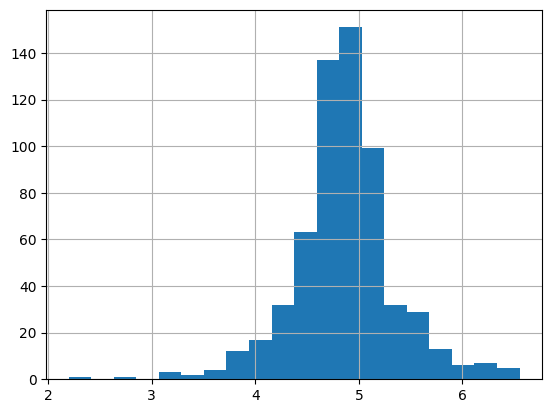

In [ ]:
df_train['LoanAmount_log']=np.log(df_train['LoanAmount'])
df_train['LoanAmount_log'].hist(bins=20)

**New Features**

We'll create three new features based on domain knowledge to potentially improve the model's ability to predict loan approval:

    1. Total Income: Combine applicant and co-applicant income to assess overall financial capacity.
    2. EMI (Equated Monthly Installment): Calculate the monthly loan repayment amount to estimate repayment burden.
    3. Balance Income: Determine the remaining income after EMI to gauge potential repayment ability.

The assumption is that higher total income and balance income correlate with increased loan approval chances, while higher EMI might negatively impact approval.

<Axes: xlabel='Total_Income', ylabel='Count'>

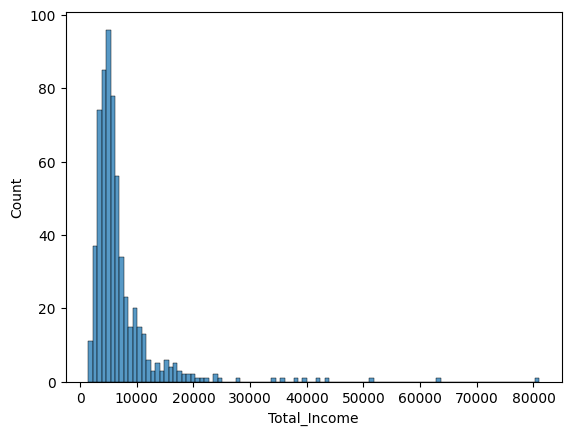

In [ ]:
import seaborn as sns
df_train['Total_Income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']
sns.histplot(df_train['Total_Income'])

We can see it is shifted towards left, i.e., the distribution is right-skewed. So, let’s take the log transformation to make the distribution normal.

<Axes: xlabel='Total_Income_log', ylabel='Count'>

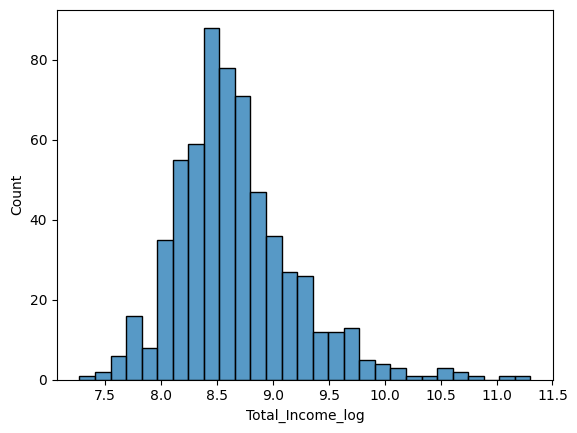

In [ ]:
df_train['Total_Income_log'] = np.log(df_train['Total_Income'])
sns.histplot(df_train['Total_Income_log'])

 Let’s create the EMI feature.

<Axes: xlabel='EMI', ylabel='Count'>

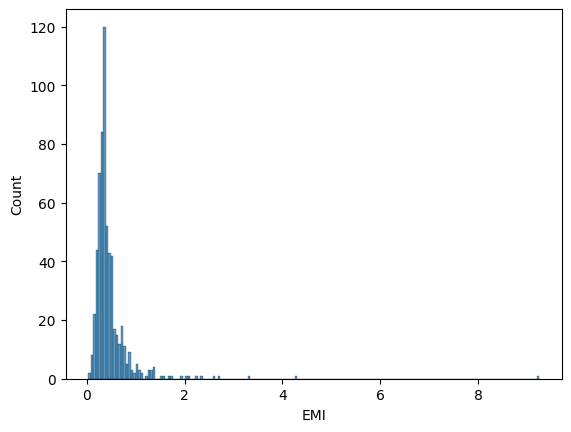

In [ ]:
df_train['EMI']=df_train['LoanAmount']/df_train['Loan_Amount_Term']
sns.histplot(df_train['EMI'])

Let's create Balance Income feature.

<Axes: xlabel='Balance Income', ylabel='Count'>

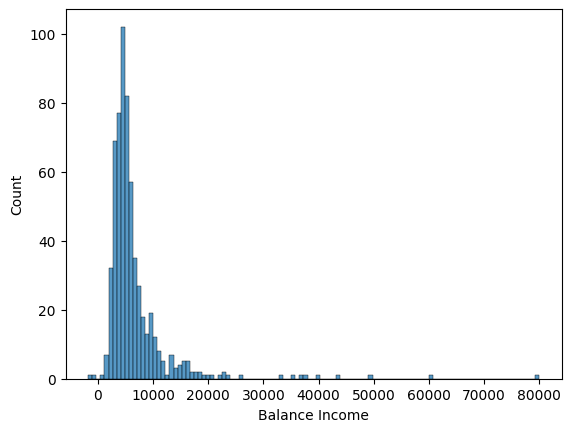

In [ ]:
df_train['Balance Income'] = df_train['Total_Income']-(df_train['EMI']*1000)
sns.histplot(df_train['Balance Income'])

In [ ]:
"""df_train['Balance Income_log'] = np.log(df_train['Balance Income'])
sns.histplot(df_train['Balance Income_log'])"""

"df_train['Balance Income_log'] = np.log(df_train['Balance Income'])\nsns.histplot(df_train['Balance Income_log'])"

We are going to save the proprocessed dataframe in a csv file

In [ ]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,3,1,4.852030,5849.0,8.674026,0.355556,5493.444444
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,4.852030,6091.0,8.714568,0.355556,5735.444444
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1,4.189655,3000.0,8.006368,0.183333,2816.666667
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1,4.787492,4941.0,8.505323,0.333333,4607.666667
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1,4.948760,6000.0,8.699515,0.391667,5608.333333


In [ ]:
# Assuming you want to save the 'train_df' DataFrame
df_train.to_csv('/workspaces/loan-elegibility-prediction/data/processed/train_data.csv', index=False) 
